In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from plot_prop import *
from plot_projections import *
from plot_param import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
propeller = pd.read_csv('propeller_data.csv')

In [39]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dlowest, dhighest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

In [73]:
nb_seg = 100

In [74]:
planes, delta_d = get_planes(upper_blade, dmiddle, dlowest, vect_length, nb_seg)   #get equations of planes for projection

In [75]:
all_plane_points = get_points(upper_blade, planes)                  #get points used for each projection

Points of plane 1
Points of plane 2
Points of plane 3
Points of plane 4
Points of plane 5
Points of plane 6
Points of plane 7
Points of plane 8
Points of plane 9
Points of plane 10
Points of plane 11
Points of plane 12
Points of plane 13
Points of plane 14
Points of plane 15
Points of plane 16
Points of plane 17
Points of plane 18
Points of plane 19
Points of plane 20
Points of plane 21
Points of plane 22
Points of plane 23
Points of plane 24
Points of plane 25
Points of plane 26
Points of plane 27
Points of plane 28
Points of plane 29
Points of plane 30
Points of plane 31
Points of plane 32
Points of plane 33
Points of plane 34
Points of plane 35
Points of plane 36
Points of plane 37
Points of plane 38
Points of plane 39
Points of plane 40
Points of plane 41
Points of plane 42
Points of plane 43
Points of plane 44
Points of plane 45
Points of plane 46
Points of plane 47
Points of plane 48
Points of plane 49
Points of plane 50
Points of plane 51
Points of plane 52
Points of plane 53
Po

In [76]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

In [77]:
x_list, y_right_list, y_left_list, right_pts, left_pts, position, rm = get_generated_points(right_param, left_param, right_pts, left_pts, delta_d)

Plane 97 has been removed
Plane 98 has been removed


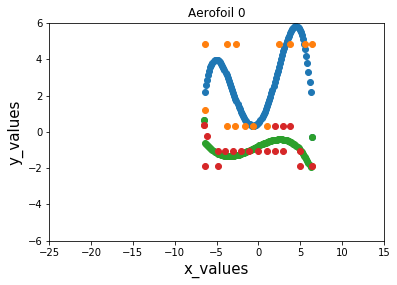

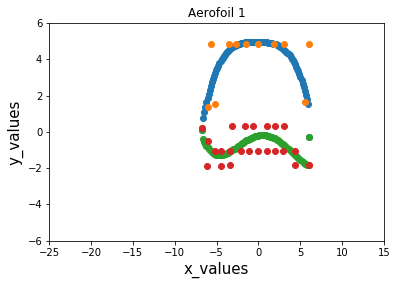

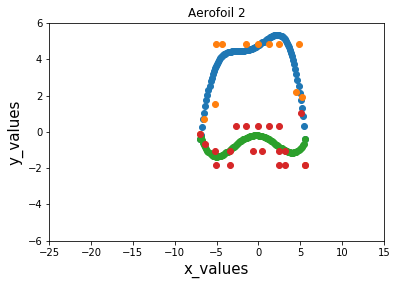

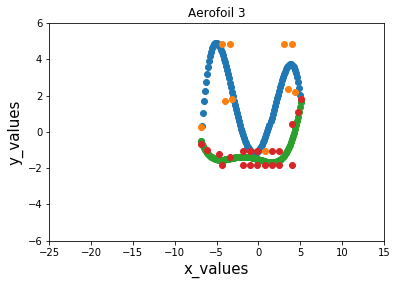

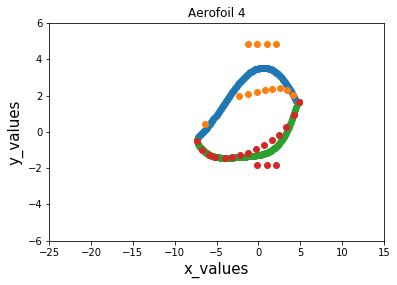

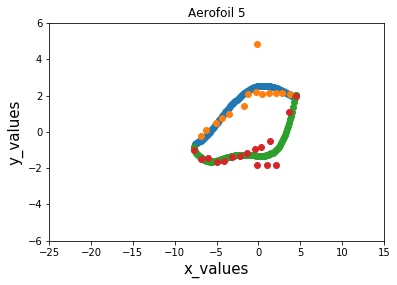

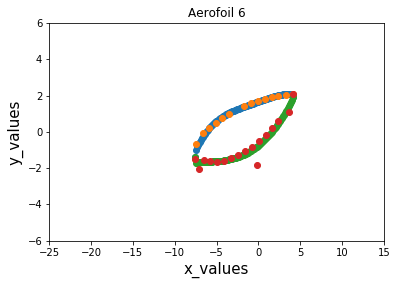

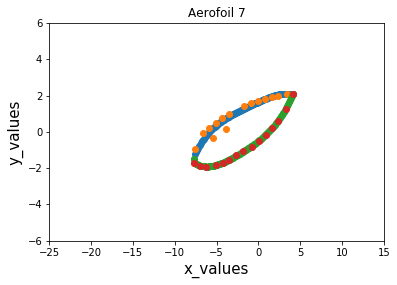

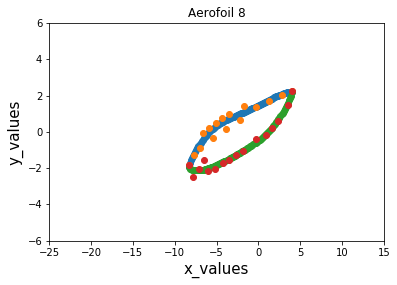

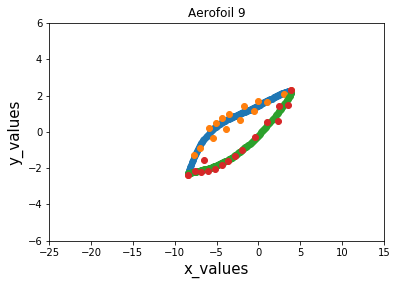

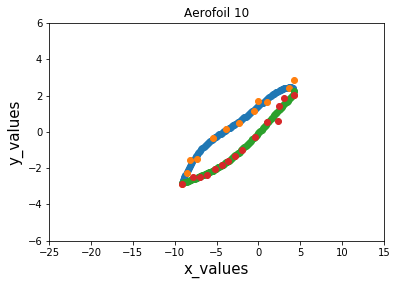

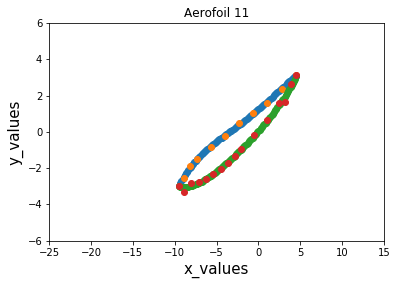

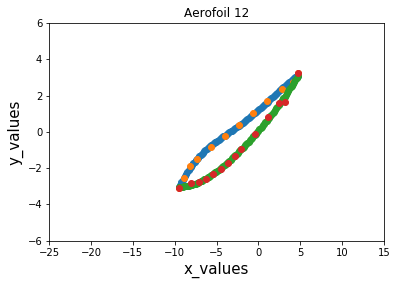

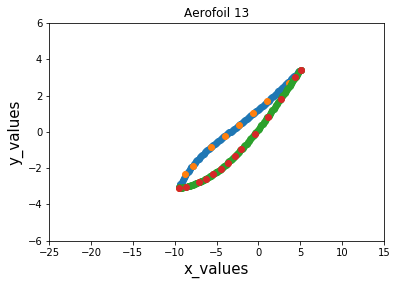

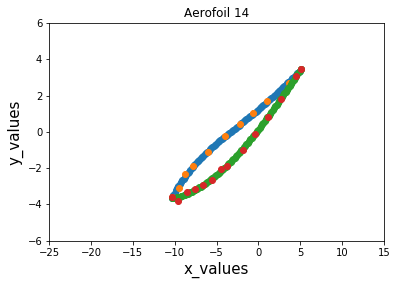

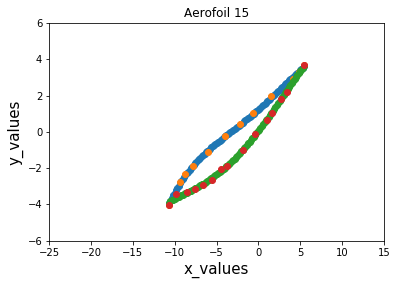

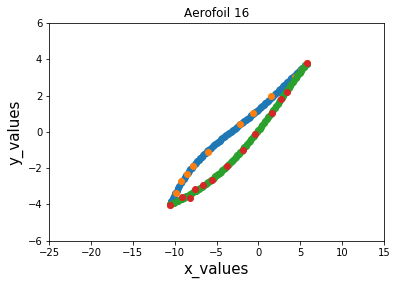

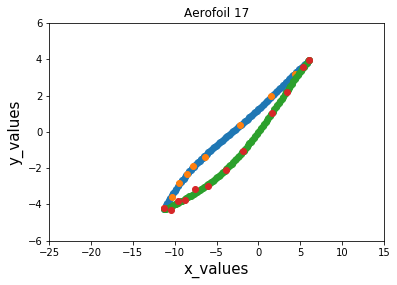

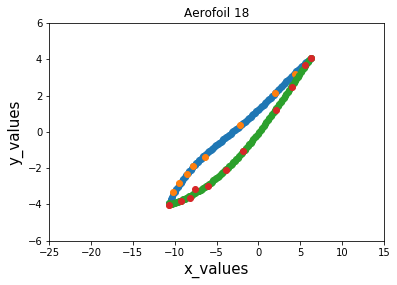

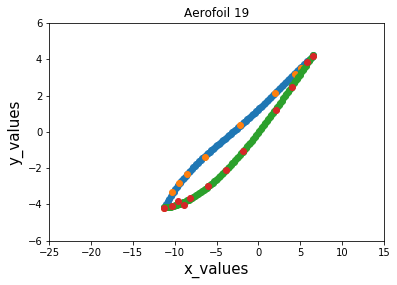

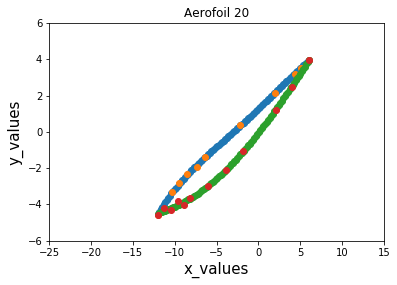

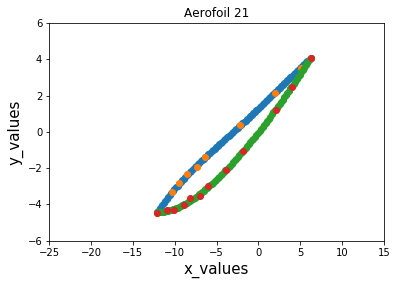

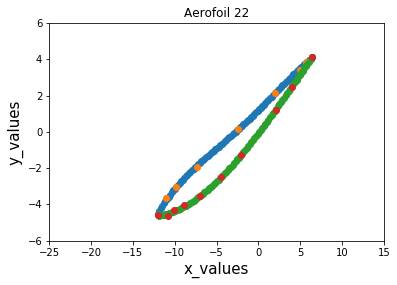

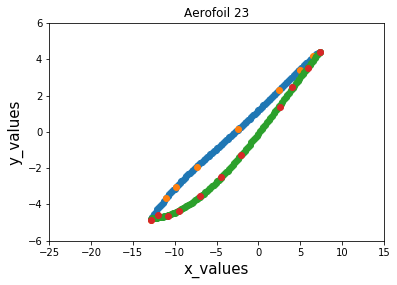

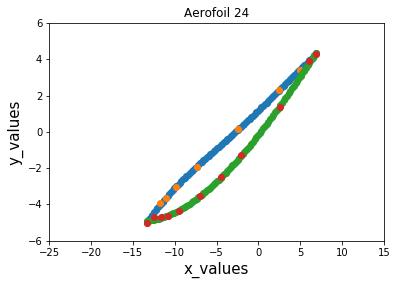

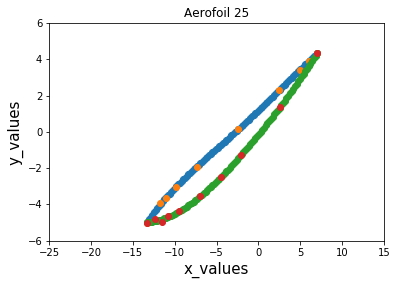

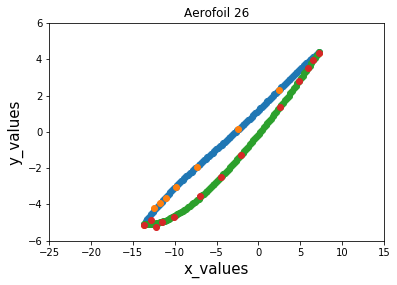

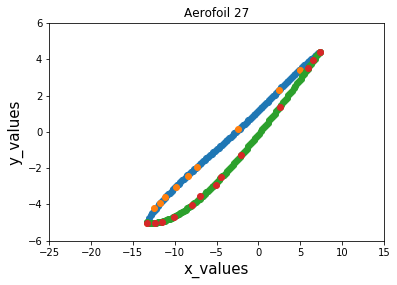

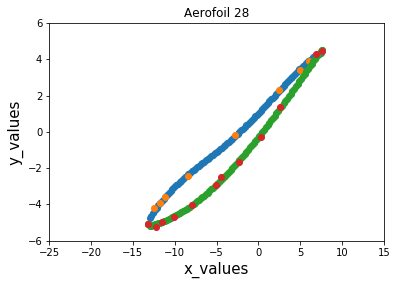

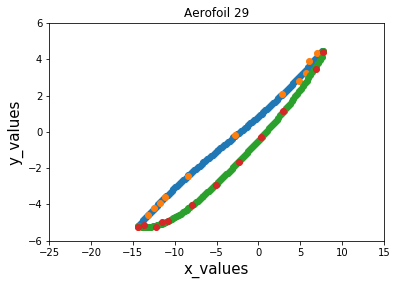

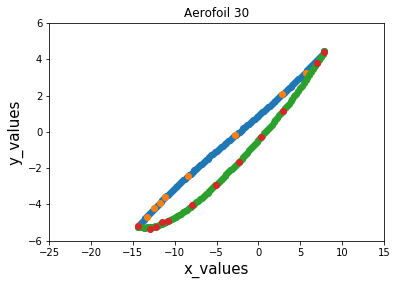

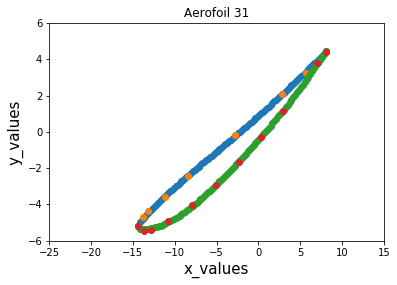

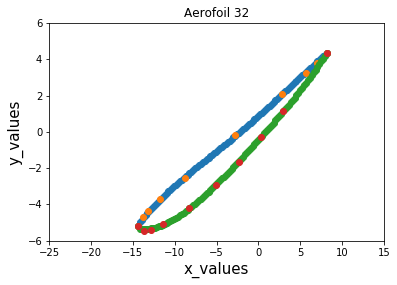

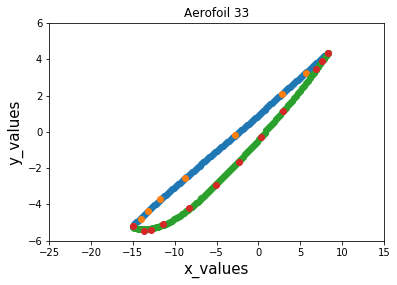

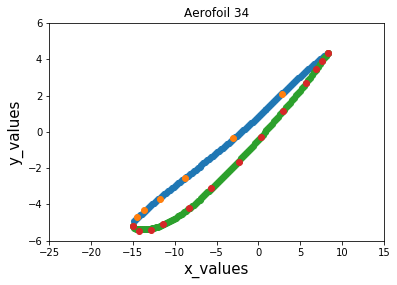

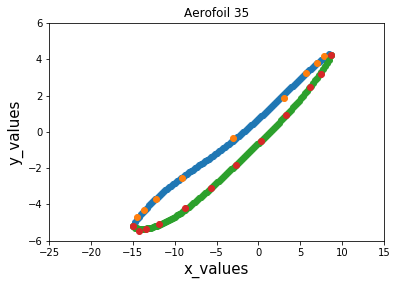

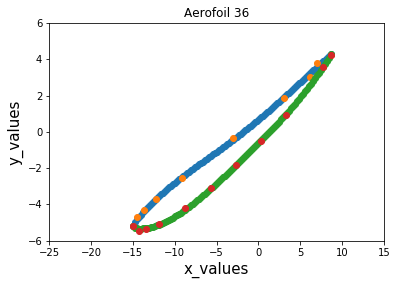

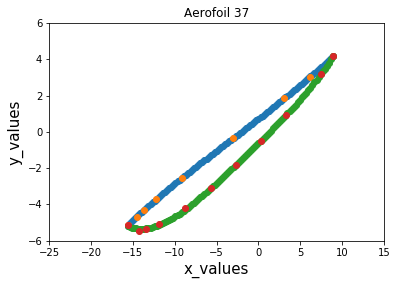

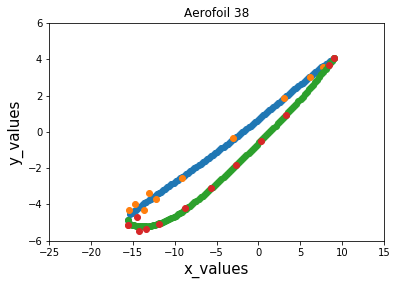

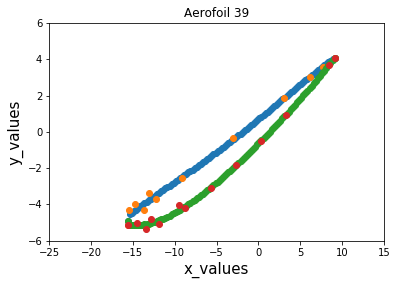

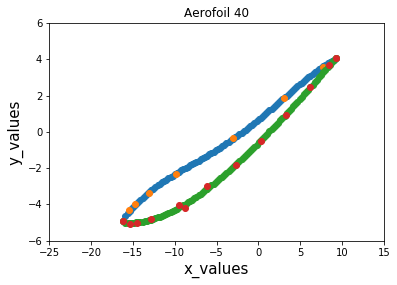

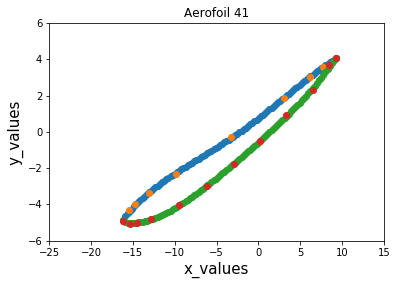

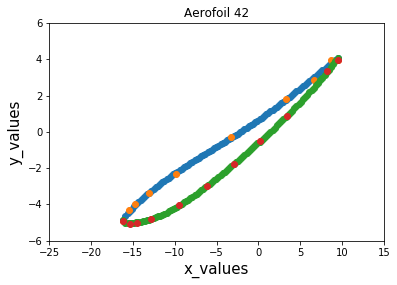

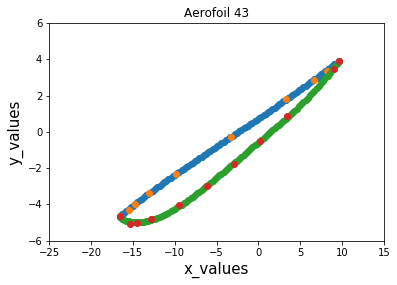

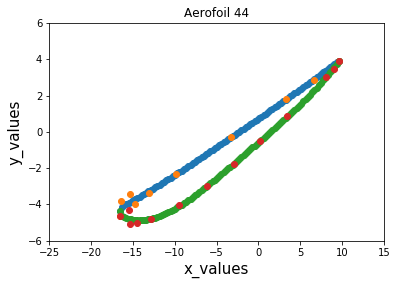

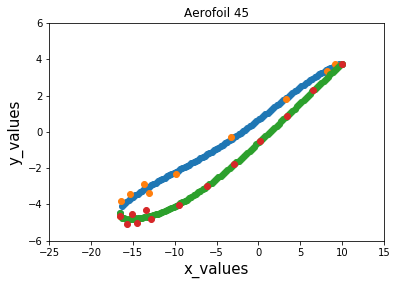

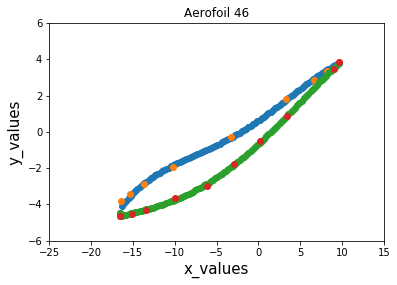

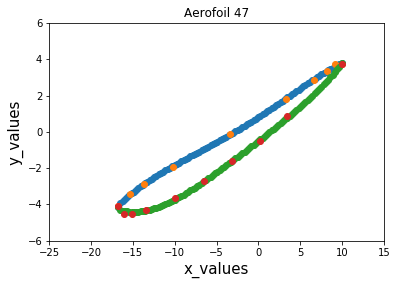

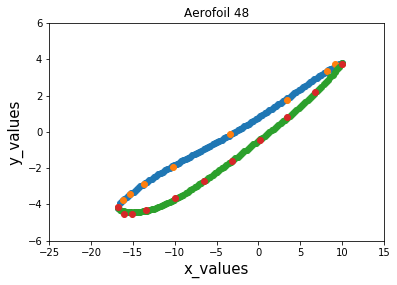

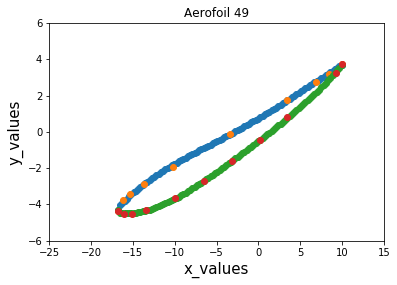

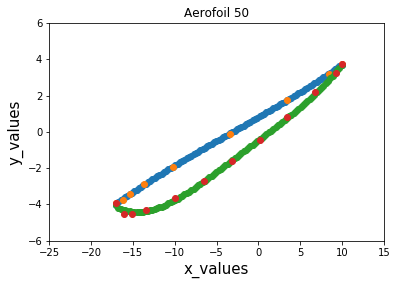

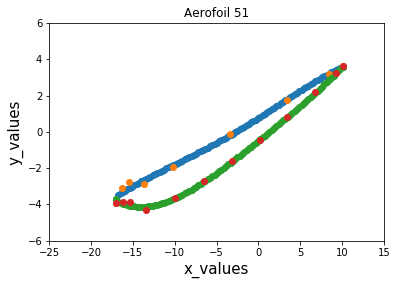

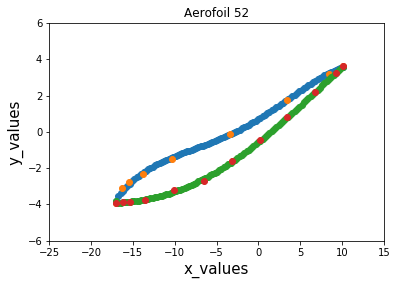

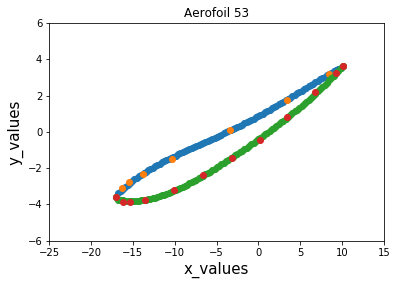

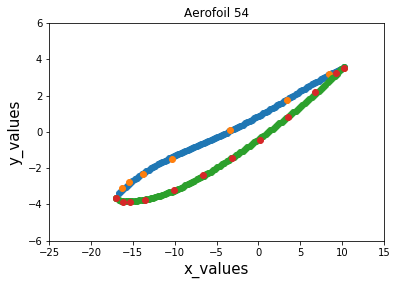

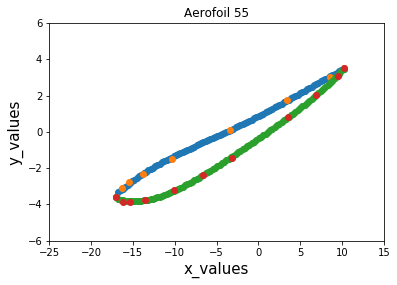

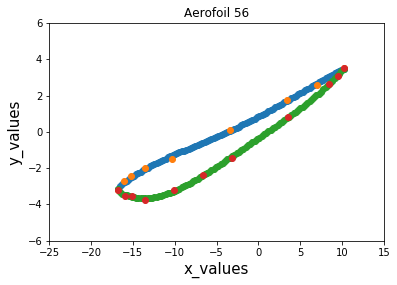

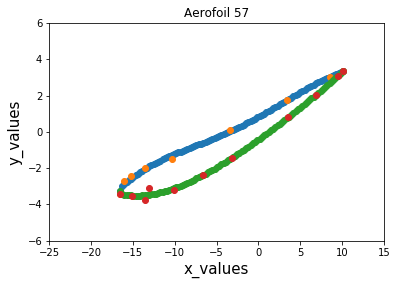

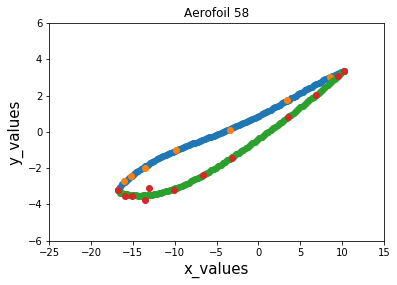

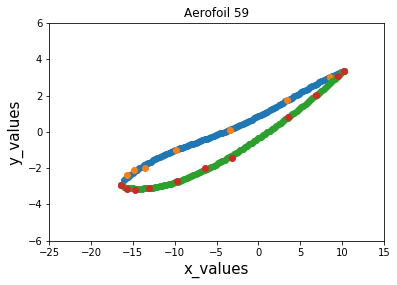

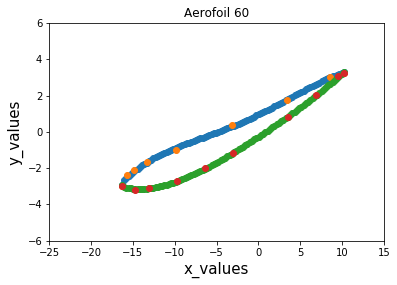

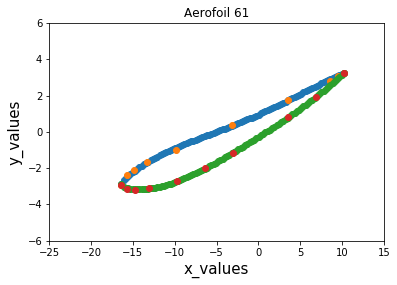

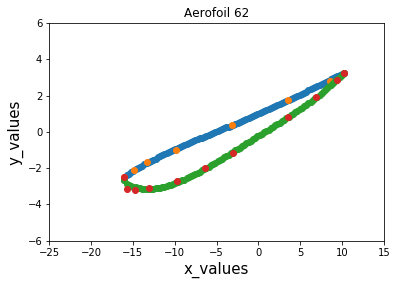

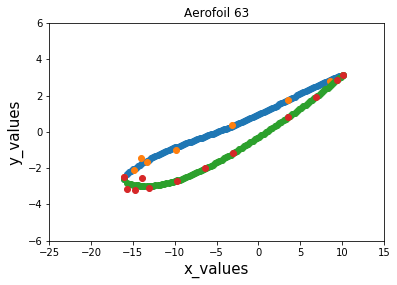

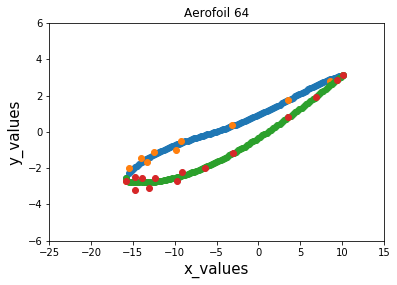

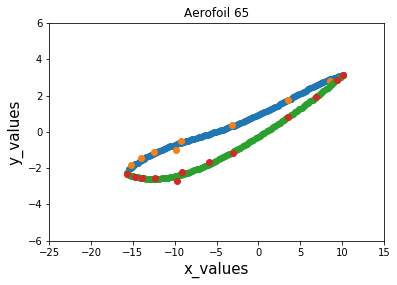

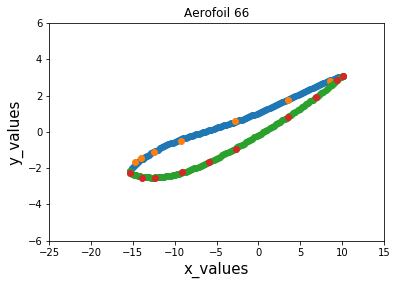

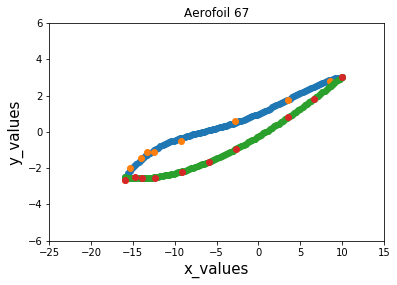

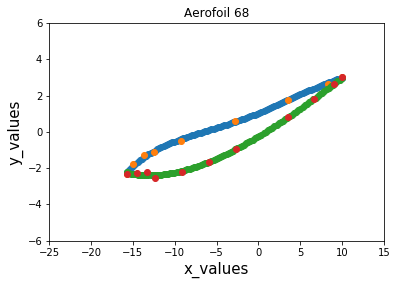

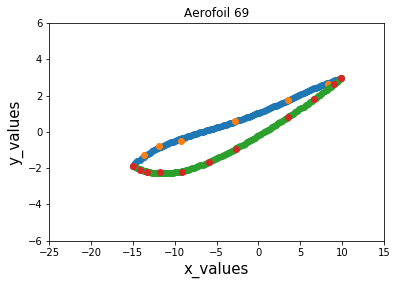

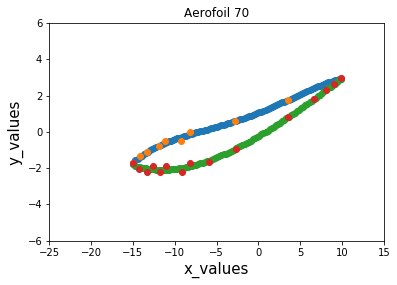

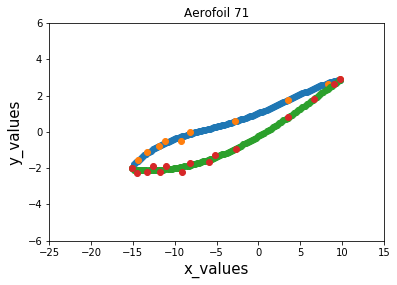

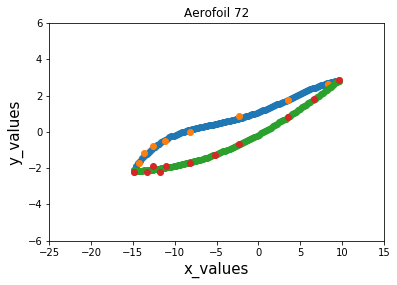

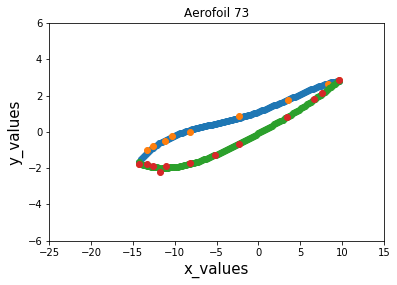

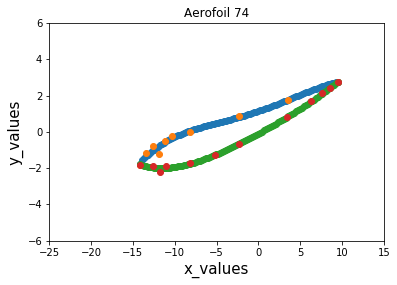

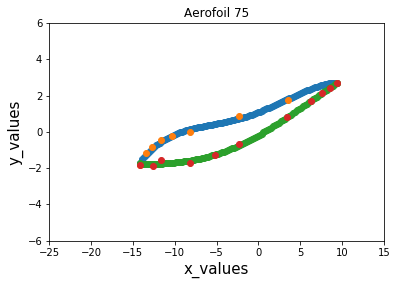

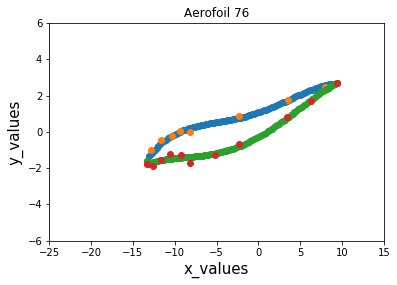

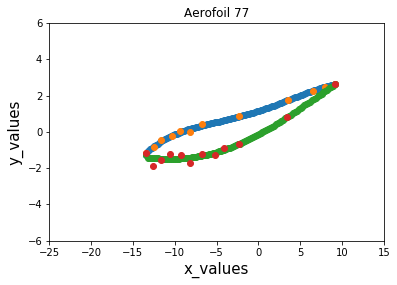

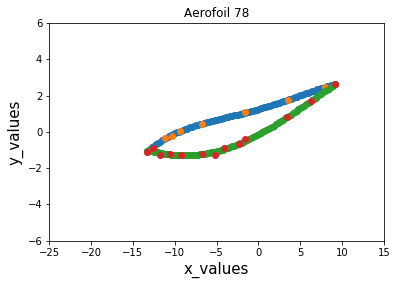

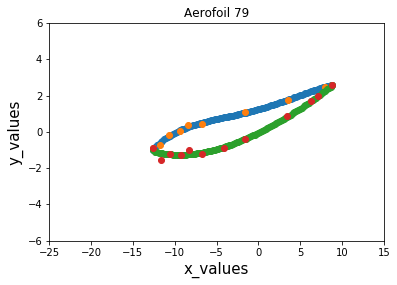

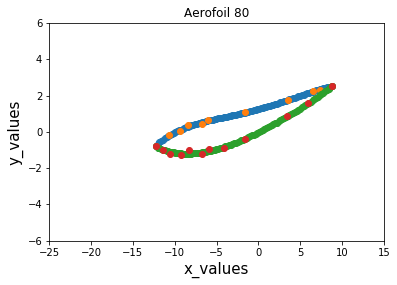

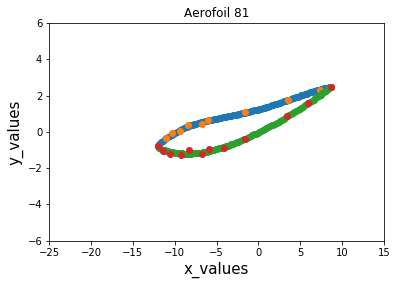

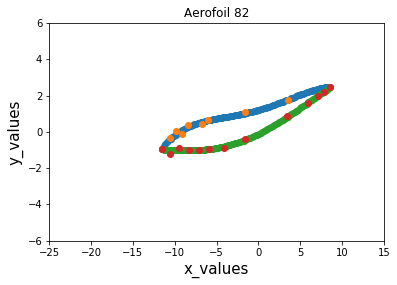

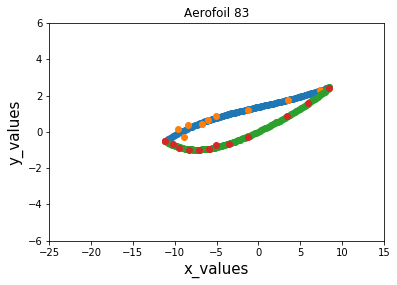

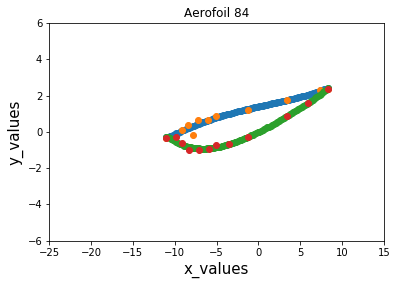

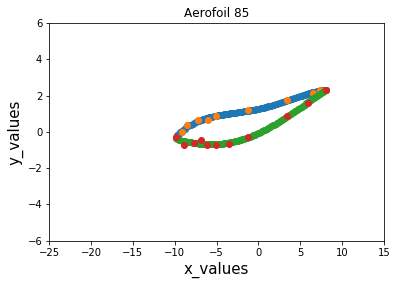

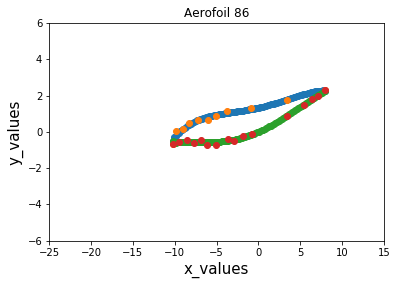

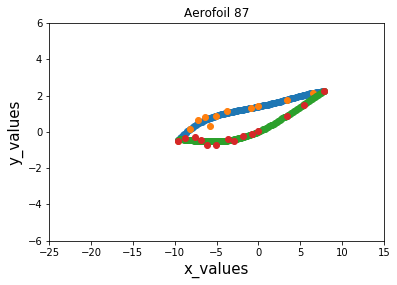

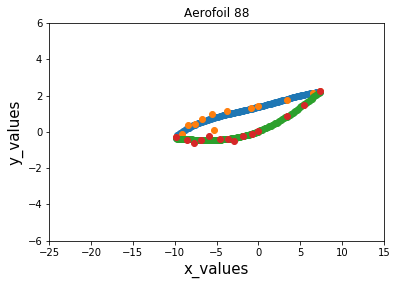

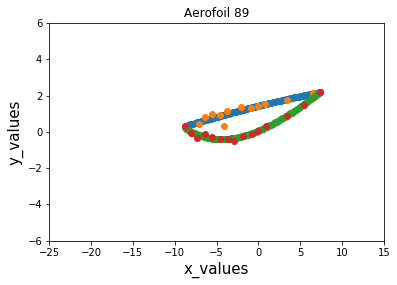

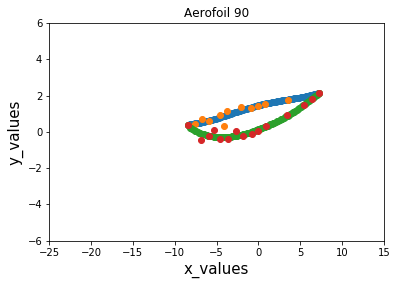

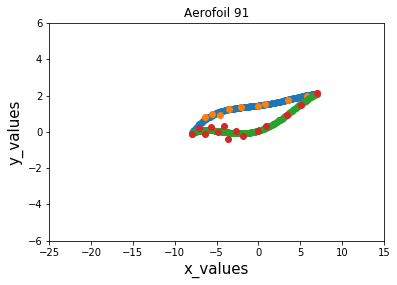

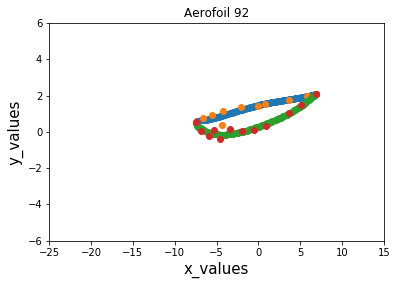

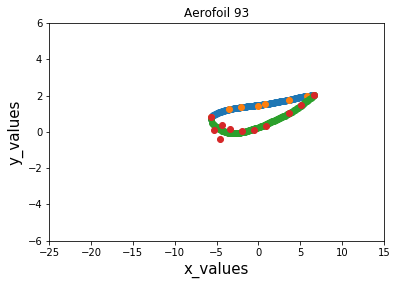

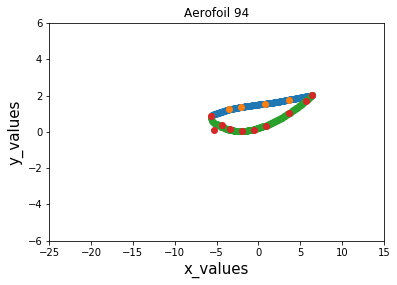

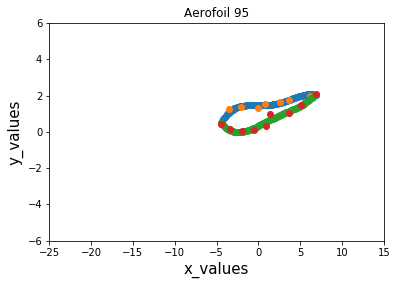

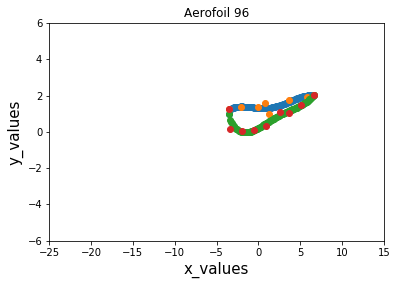

In [78]:
for i in range(len(all_plane_points) - rm):
    plot_interpolation_both_sides( right_pts[i], left_pts[i], x_list[i], y_right_list[i], y_left_list[i], i, "Aerofoil " + str(i))

In [79]:
#####################################################################################################
##########################              PARAMETERS              #####################################
#####################################################################################################

### Hub

In [80]:
hub_inner_radius = get_hub_inner_radius(propeller_coords, vect_length)
hub_radius = param_hub_radius(propeller_coords, vect_length)
print(hub_radius)

8.098715634048968


### Tip radius

In [81]:
tip_radius = get_tip_radius(propeller_coords)
print(tip_radius)

126.80676910381526


### Blade twist

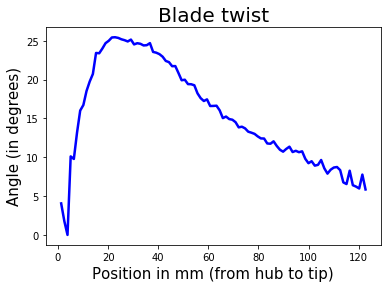

In [82]:
blade_twist = get_blade_twist(x_list, y_right_list, y_left_list)
plot_blade_twist(blade_twist, position)

### Chord length

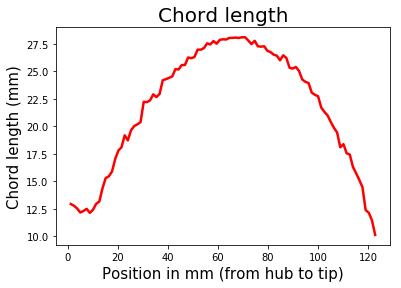

In [83]:
chord_length = get_chord_length(x_list, y_right_list, y_left_list)
plot_chord_length(chord_length, position)

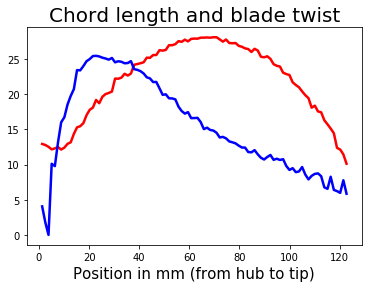

In [84]:
plot_chord_blade(chord_length, blade_twist, position)

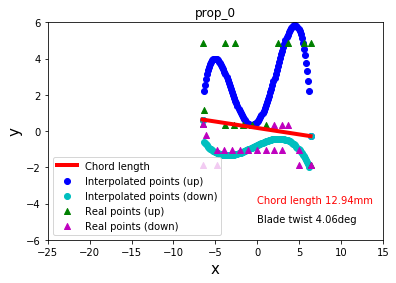

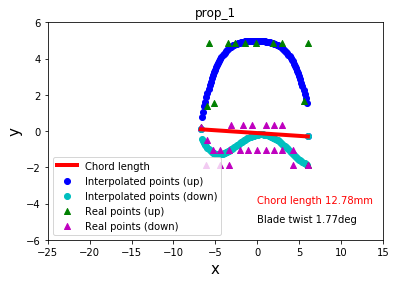

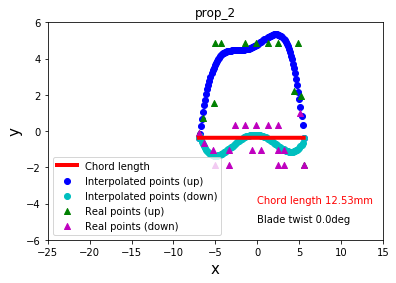

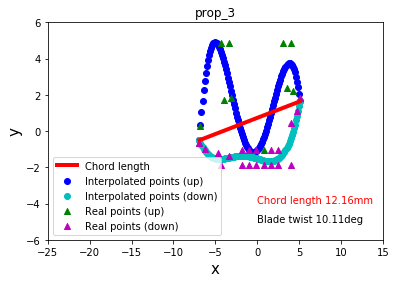

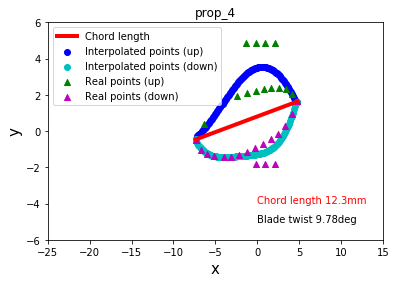

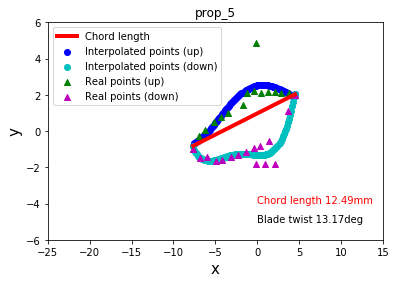

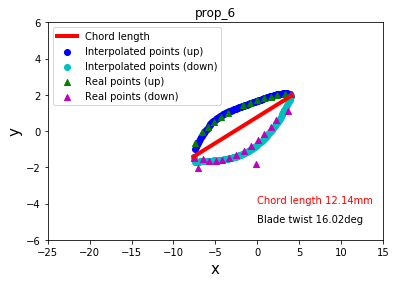

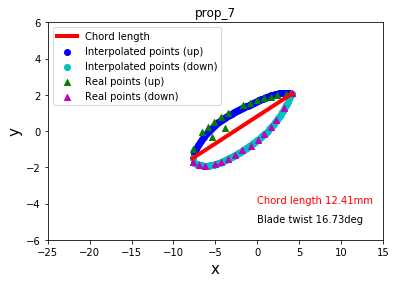

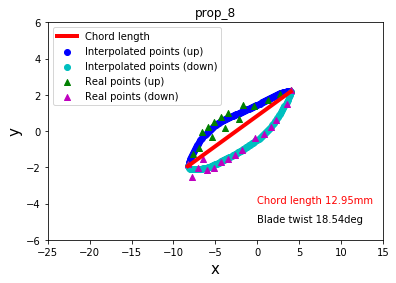

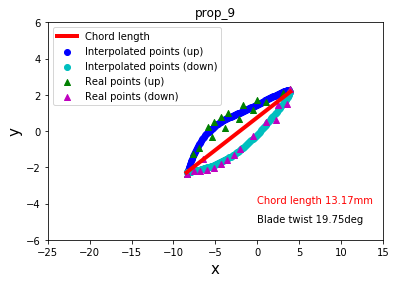

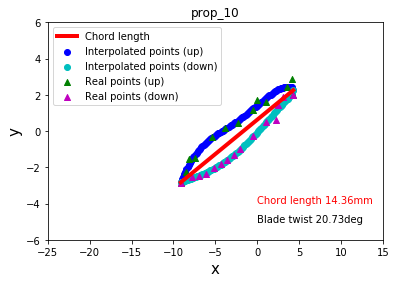

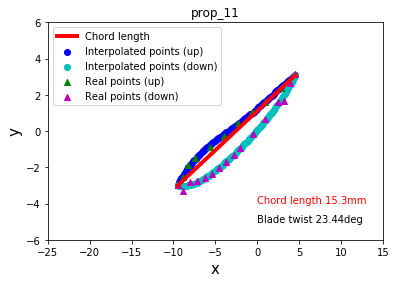

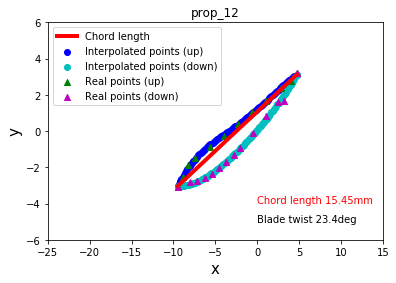

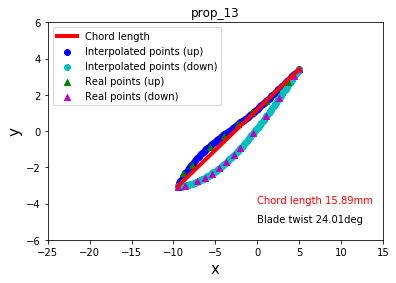

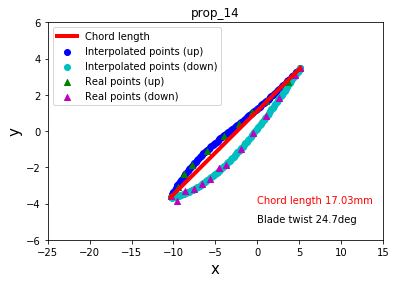

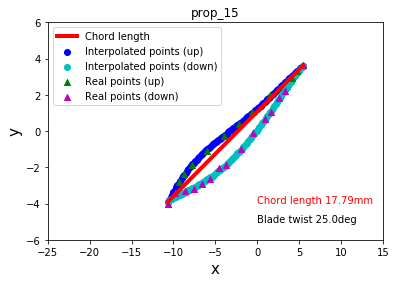

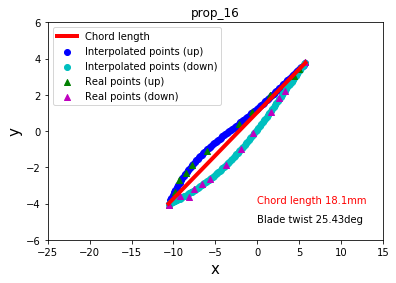

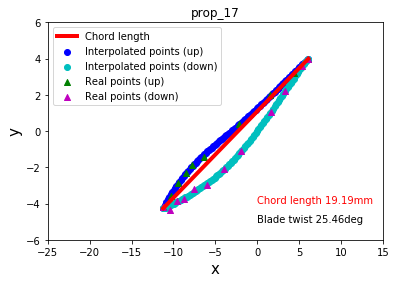

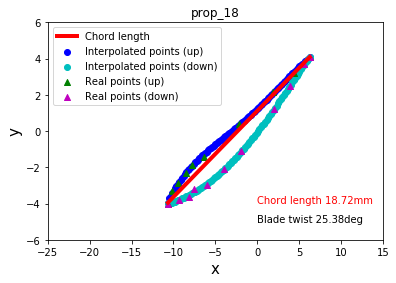

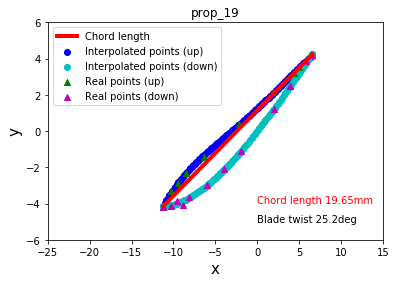

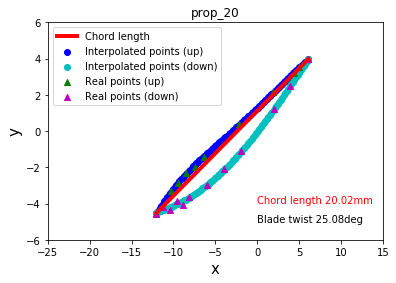

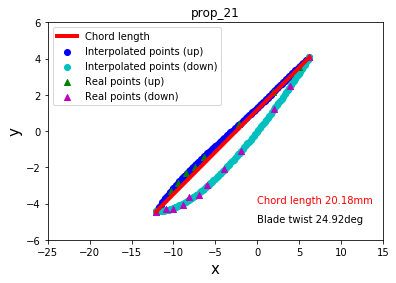

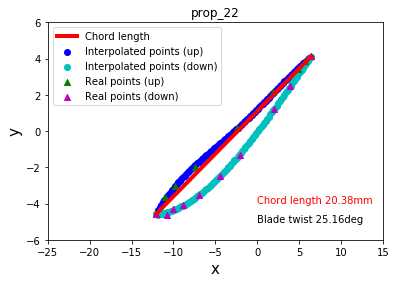

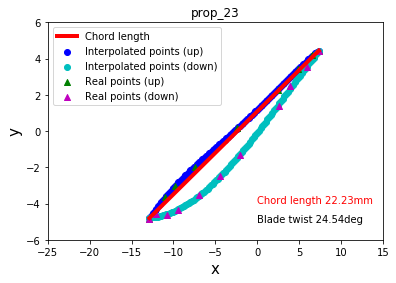

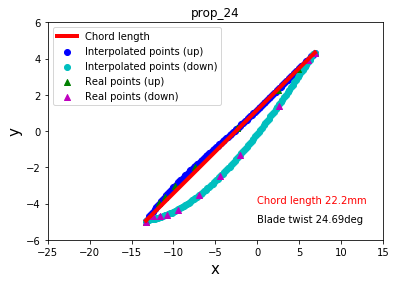

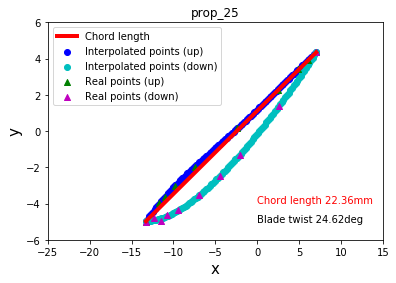

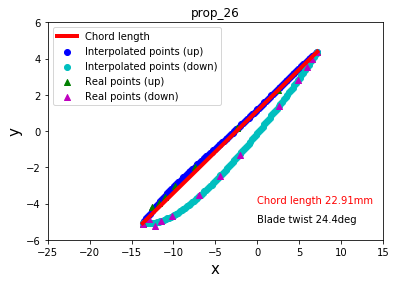

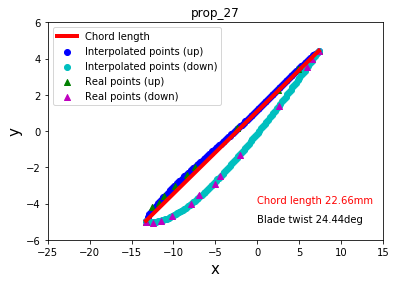

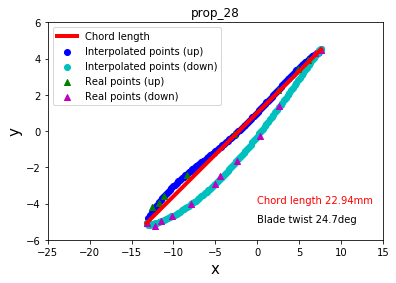

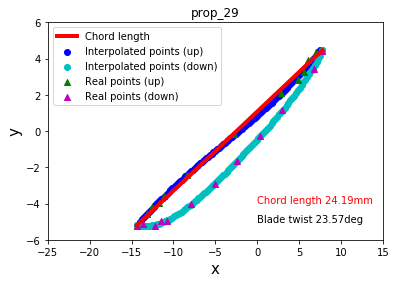

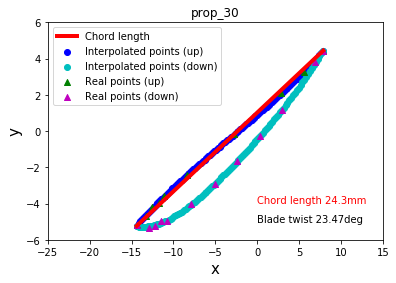

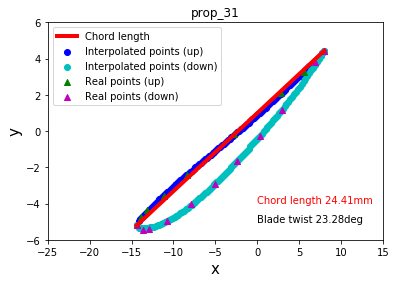

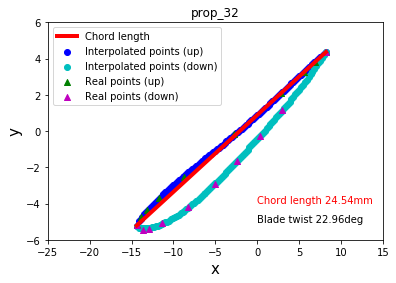

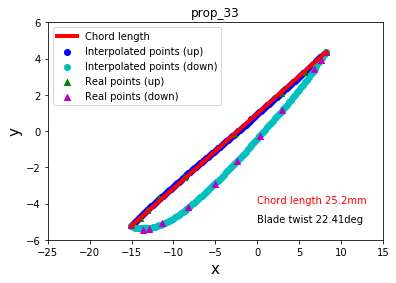

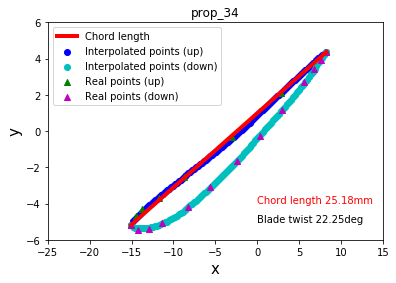

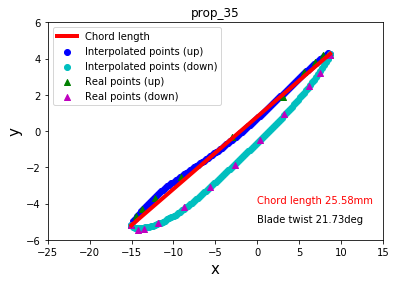

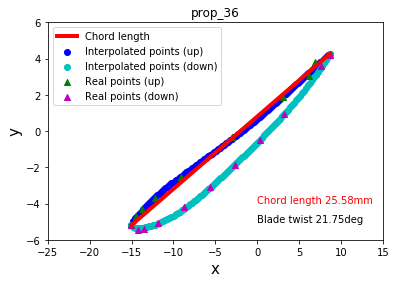

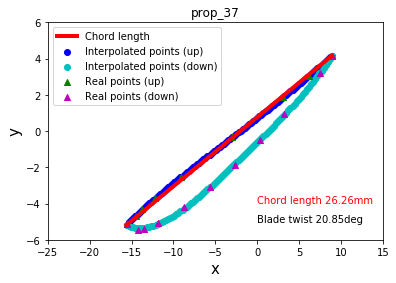

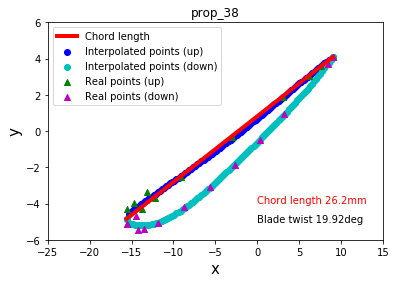

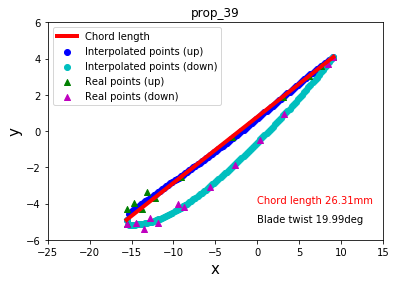

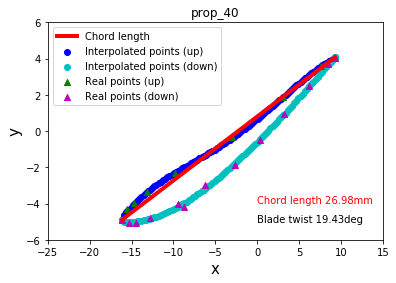

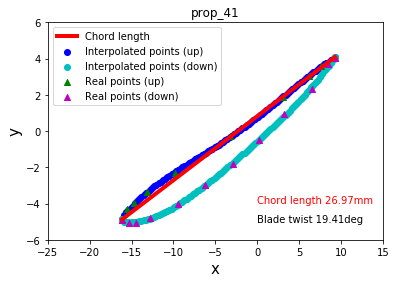

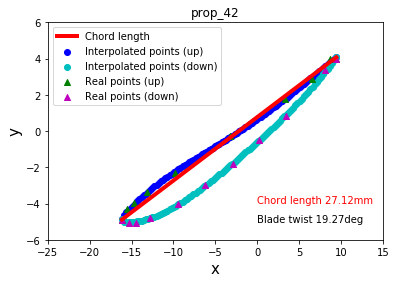

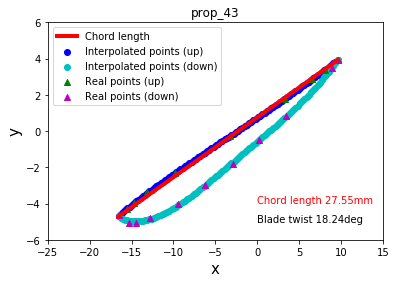

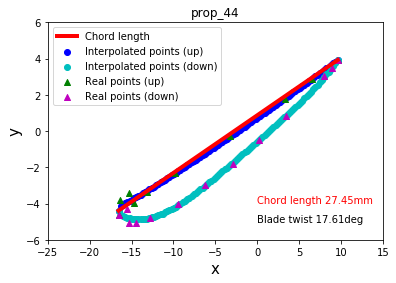

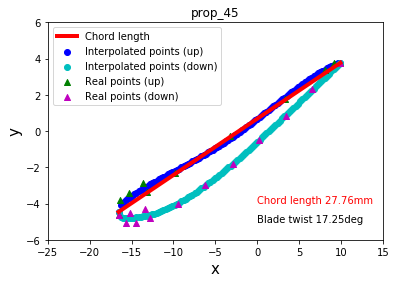

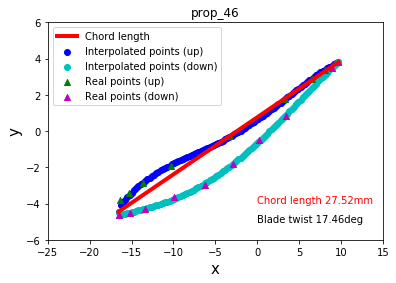

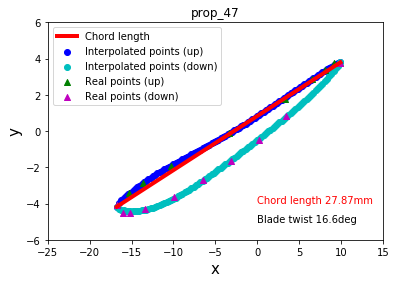

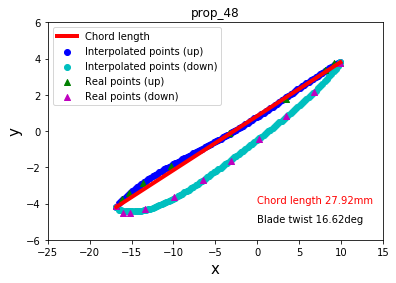

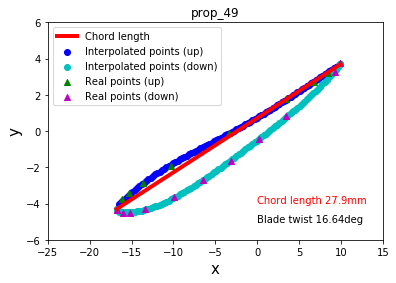

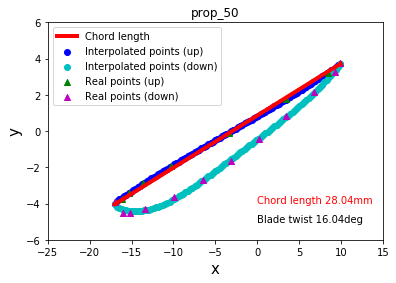

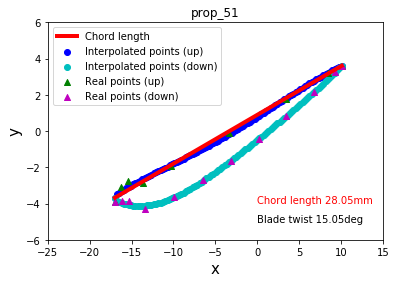

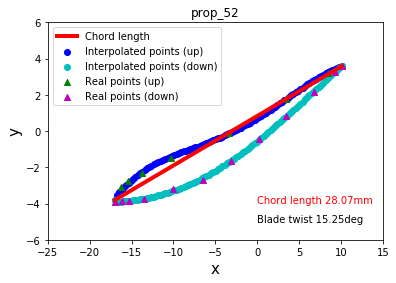

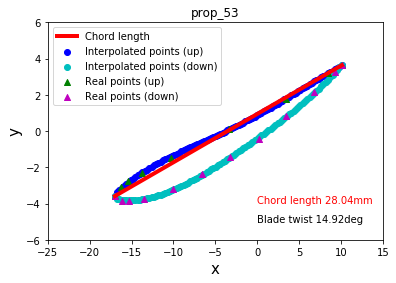

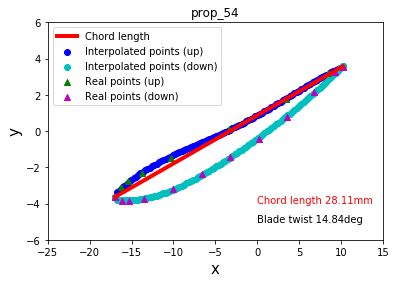

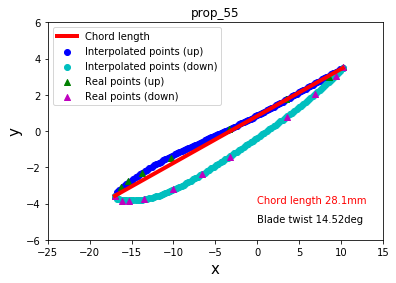

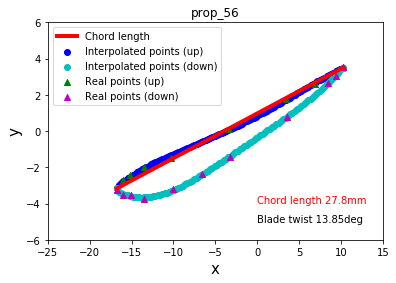

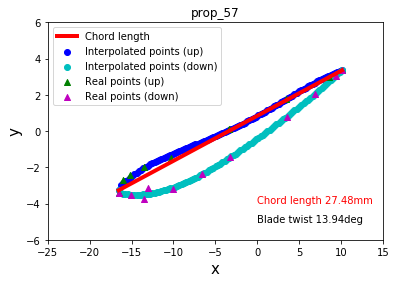

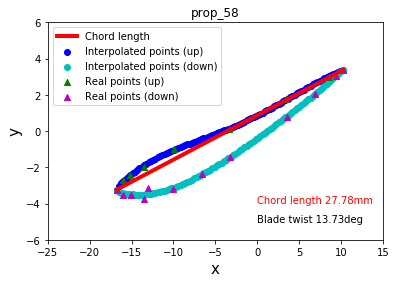

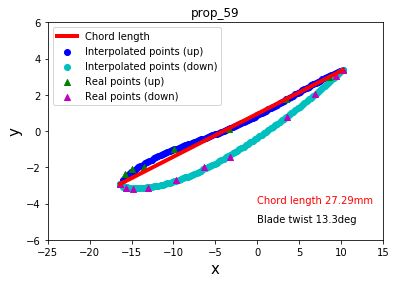

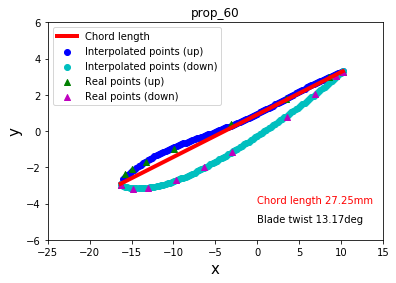

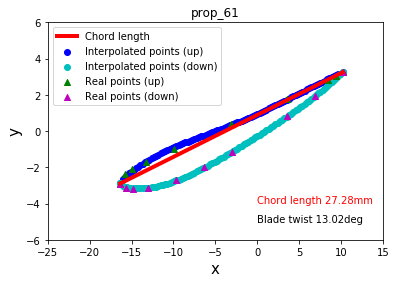

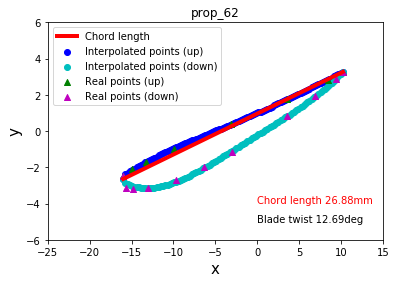

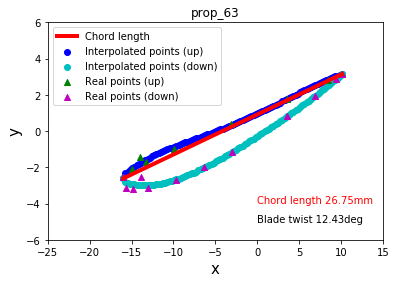

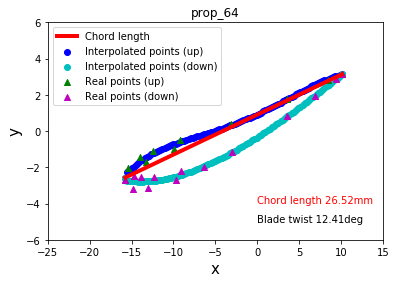

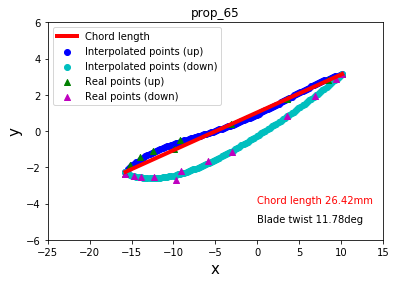

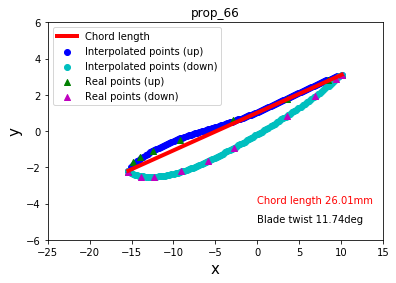

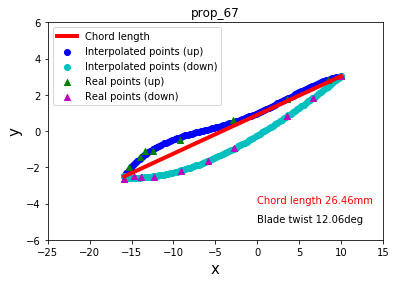

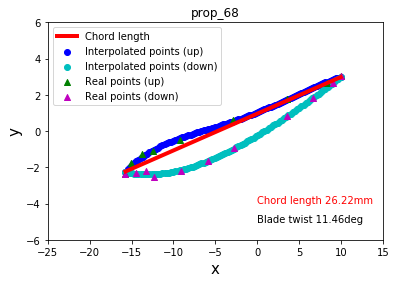

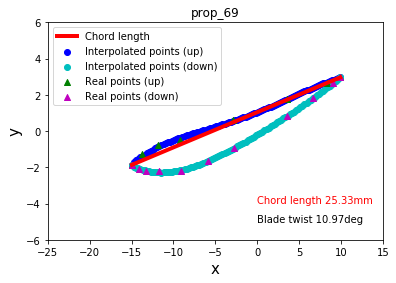

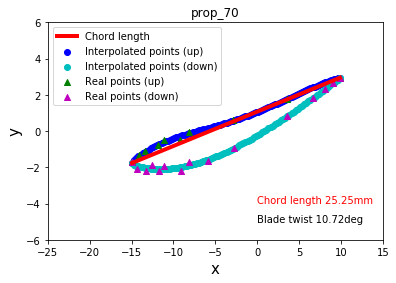

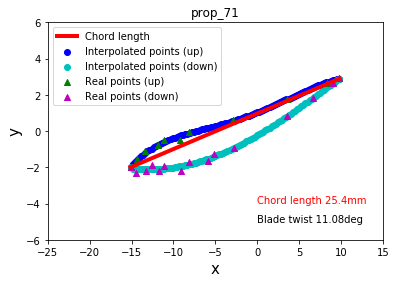

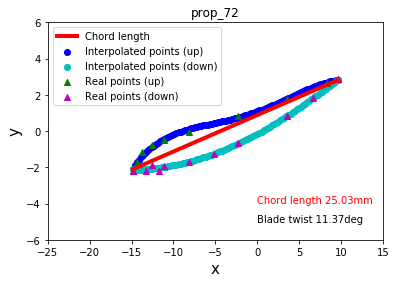

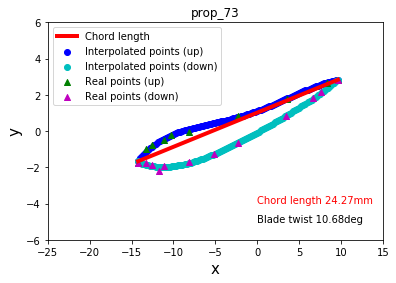

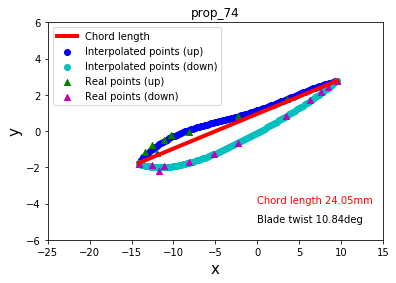

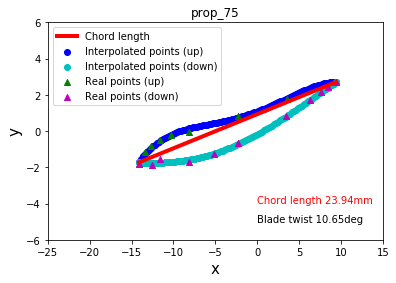

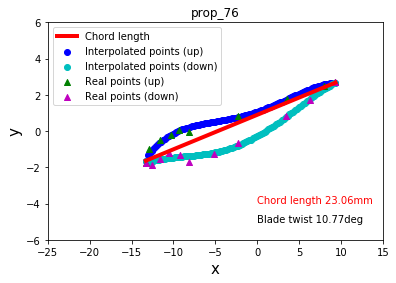

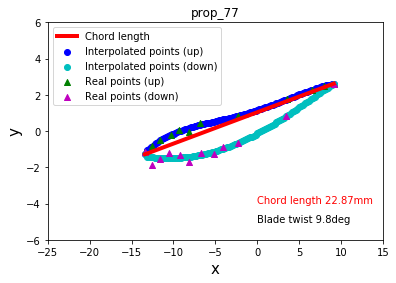

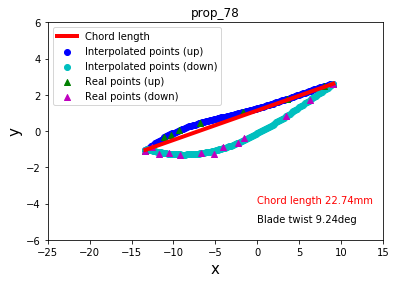

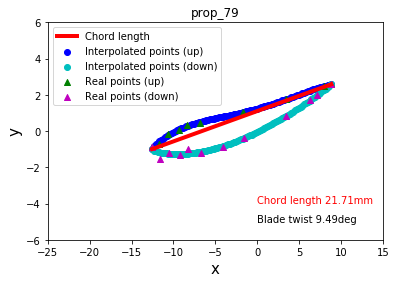

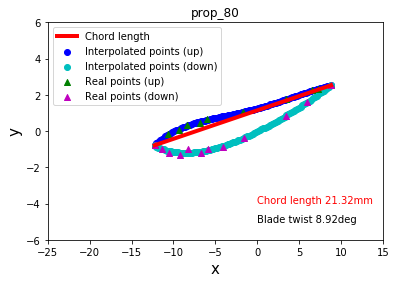

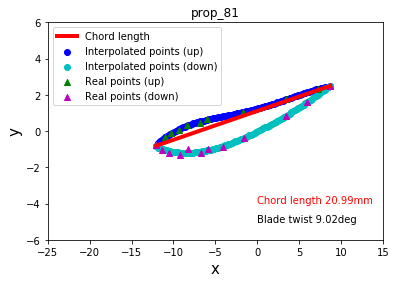

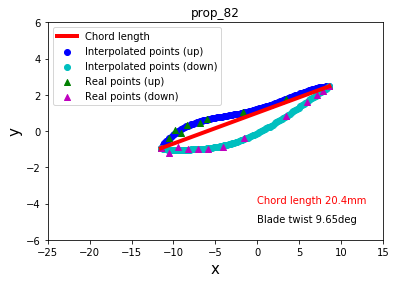

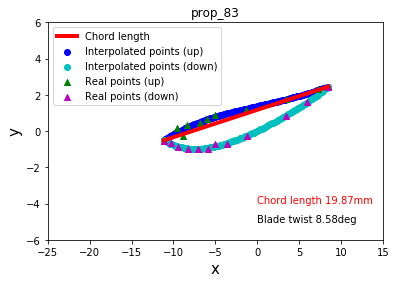

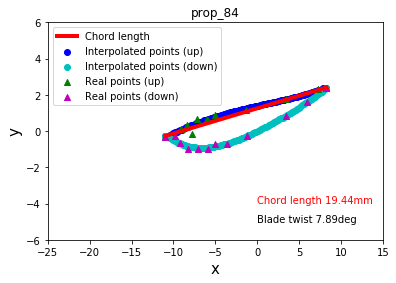

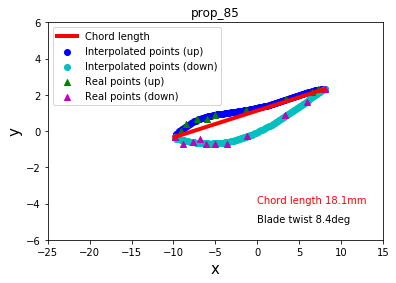

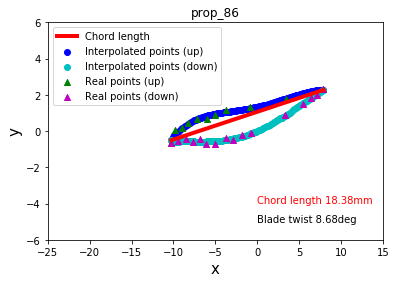

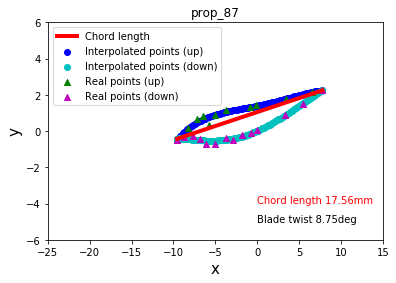

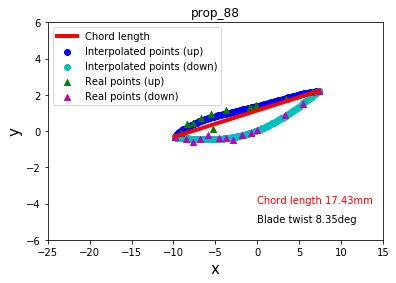

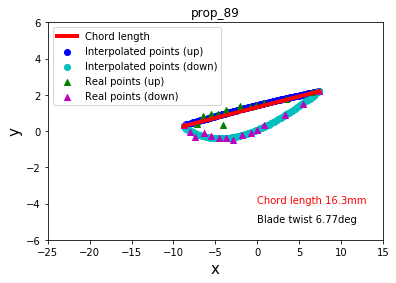

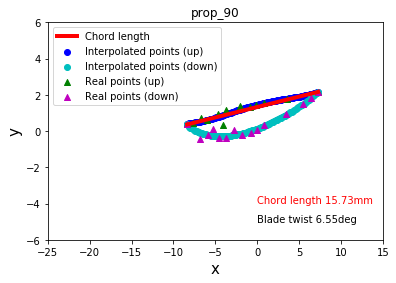

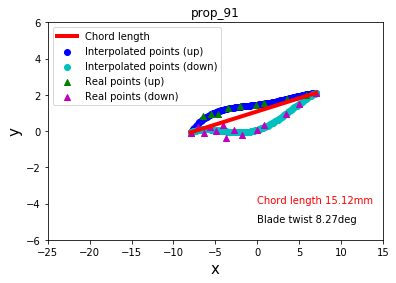

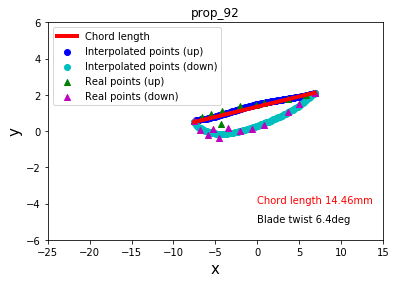

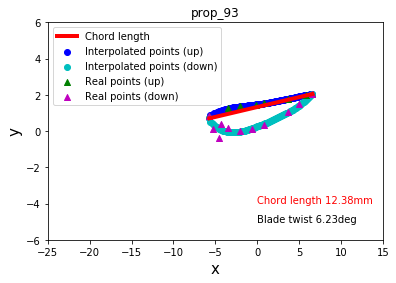

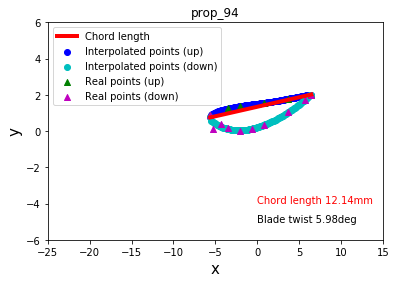

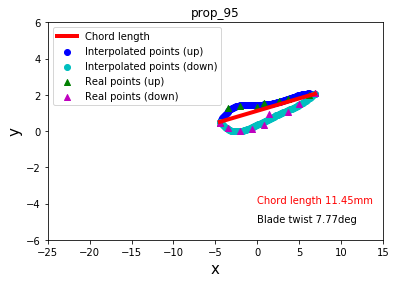

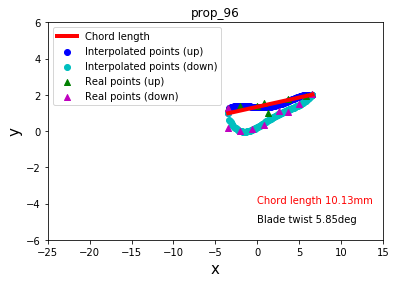

In [85]:
for i in range(len(all_plane_points) - rm):
    plot_interpolation_param(right_pts[i], left_pts[i], x_list[i], y_right_list[i], y_left_list[i], i, "prop_" + str(i), chord_length, blade_twist)